import libraries

In [1]:
import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

open data

In [2]:
with open('data.txt') as myFile:
  text = myFile.read()
result = text.split('\n') 


remove the last empty sample

In [3]:
result= result [0:-1]

Get data as float

In [4]:
data=[]
for i in result:
  resultNew = i.split(',')  
  temp = []
  for j in resultNew:
    temp.append(float(j))
  data.append(temp)


Get labels

In [5]:
labels = []
for i in range(len(data)):
  labels.append(data[i][-1])
  data[i] = data[i][0:-1]
  
data = np.array(data)
labels = np.array(labels)


In [6]:
targets = ['1','2','3','4']

Number of Instances

In [7]:
len(data)

4480

Number of Attributes (533) + Class (1)

In [8]:
len(data[0])

534

In [9]:
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
          for j in range (cm.shape[1]):
                 plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Decision tree

In [10]:
kf = KFold(n_splits=5)
accuracy_dt = []
f1_dt = []
precision_dt = []
recall_dt = []
confusionMatrix_dt = []

for train, test in kf.split(data):
    X_train, X_test = data[train], data[test]
    y_train, y_test = labels[train], labels[test]

    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
    clf = clf.fit(X_train, y_train)

    accuracy_dt.append(accuracy_score(y_test, clf.predict(X_test)))
    f1_dt.append(f1_score(y_test, clf.predict(X_test), average = None))
    precision_dt.append(precision_score(y_test, clf.predict(X_test), average = None))
    recall_dt.append(recall_score(y_test, clf.predict(X_test), average="macro"))
    confusionMatrix_dt.append(confusion_matrix(y_test, clf.predict(X_test)))

In [11]:
mean(accuracy_dt)

0.6908482142857143

In [12]:
mean(f1_dt)

0.678409838750908

In [13]:
mean(precision_dt)

0.6974070852425109

In [14]:
mean(recall_dt)

0.6908482142857143

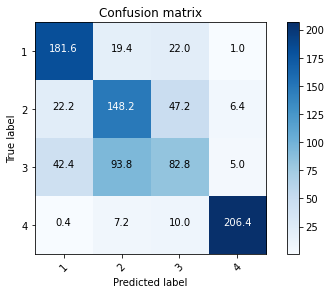

In [15]:
plot_confusion_matrix(np.mean(confusionMatrix_dt, axis = 0), targets)

Random Forest

In [16]:
kf = KFold(n_splits=5)
accuracy_RF = []
f1_RF = []
precision_RF = []
recall_RF = []
confusionMatrix_RF = []

for train, test in kf.split(data):
    X_train, X_test = data[train], data[test]
    y_train, y_test = labels[train], labels[test]

    clf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
    clf.fit(X_train, y_train)

    accuracy_RF.append(accuracy_score(y_test, clf.predict(X_test)))
    f1_RF.append(f1_score(y_test, clf.predict(X_test), average = None))
    precision_RF.append(precision_score(y_test, clf.predict(X_test), average = None))
    recall_RF.append(recall_score(y_test, clf.predict(X_test), average="macro"))
    confusionMatrix_RF.append(confusion_matrix(y_test, clf.predict(X_test)))

In [17]:
mean(accuracy_RF)

0.7435267857142858

In [18]:
mean(f1_RF)

0.7408191623261469

In [19]:
mean(precision_RF)

0.7507080416875747

In [20]:
mean(recall_RF)

0.7435267857142858

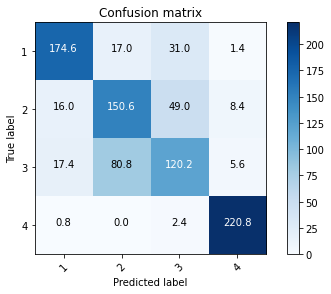

In [21]:
plot_confusion_matrix(np.mean(confusionMatrix_RF, axis = 0), targets)

XGBoost

In [22]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

kf = KFold(n_splits=5)
accuracy_XG = []
f1_XG = []
precision_XG = []
recall_XG = []
confusionMatrix_XG = []

for train, test in kf.split(data):
    X_train, X_test = data[train], data[test]
    y_train, y_test = labels[train], labels[test]

    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1)
    clf.fit(X_train, y_train)

    accuracy_XG.append(accuracy_score(y_test, clf.predict(X_test)))
    f1_XG.append(f1_score(y_test, clf.predict(X_test), average = None))
    precision_XG.append(precision_score(y_test, clf.predict(X_test), average = None))
    recall_XG.append(recall_score(y_test, clf.predict(X_test), average="macro"))
    confusionMatrix_XG.append(confusion_matrix(y_test, clf.predict(X_test)))

In [23]:
mean(accuracy_XG)

0.7435267857142858

In [24]:
mean(f1_XG)

0.7403294585277551

In [25]:
mean(precision_XG)

0.7555757650379884

In [26]:
mean(recall_XG)

0.7435267857142858

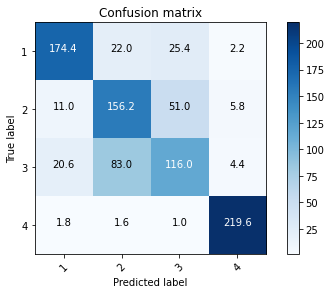

In [27]:
plot_confusion_matrix(np.mean(confusionMatrix_XG, axis = 0), targets)

SVM

In [28]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


kf = KFold(n_splits=5)
accuracy_SVM = []
f1_SVM = []
precision_SVM = []
recall_SVM = []
confusionMatrix_SVM = []

for train, test in kf.split(data):
    X_train, X_test = data[train], data[test]
    y_train, y_test = labels[train], labels[test]

    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf = clf.fit(X_train, y_train)

    accuracy_SVM.append(accuracy_score(y_test, clf.predict(X_test)))
    f1_SVM.append(f1_score(y_test, clf.predict(X_test), average = None))
    precision_SVM.append(precision_score(y_test, clf.predict(X_test), average = None))
    recall_SVM.append(recall_score(y_test, clf.predict(X_test), average="macro"))
    confusionMatrix_SVM.append(confusion_matrix(y_test, clf.predict(X_test)))

In [29]:
mean(accuracy_SVM)

0.7207589285714285

In [30]:
mean(f1_SVM)

0.7138658841962213

In [31]:
mean(precision_SVM)

0.7242036594886424

In [32]:
mean(recall_SVM)

0.7207589285714285

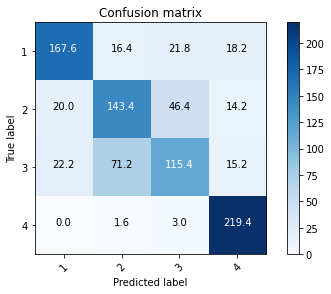

In [33]:
  plot_confusion_matrix(np.mean(confusionMatrix_SVM, axis = 0), targets)